In [1537]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
import pytz
from datetime import datetime
import plotly.graph_objects as go
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import webbrowser
import os

In [1538]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rakes\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [1539]:
apps_df=pd.read_csv('Play Store Data.csv')
reviews_df=pd.read_csv('User Reviews.csv')

In [1540]:
apps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [1541]:
reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [1542]:
#pd.read_csv() : csv files
#pd.read_excel() : excel files
#pd.read_sql() : SQL Databases
#pd.read_json() : JSON Files

In [1543]:
#df.isnull() : Missing values
#df.dropna() : Removes rows and columns that contain the missing values
#df.fillna() : Fills missing values

In [1544]:
#df.duplicated() : Identifies duplicates
#df.drop_duplicates() : Removes duplicate rows

In [1545]:
#Step 2 : Data Cleaning
apps_df = apps_df.dropna(subset=['Rating'])
for column in apps_df.columns :
    apps_df[column].fillna(apps_df[column].mode()[0],inplace=True)
apps_df.drop_duplicates(inplace=True)
apps_df=apps_df=apps_df[apps_df['Rating']<=5]
reviews_df.dropna(subset=['Translated_Review'],inplace=True)

C:\Users\rakes\AppData\Local\Temp\ipykernel_15092\2487222361.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [1546]:
apps_df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [1547]:
#Convert the Installs columns to numeric by removing commas and +
apps_df['Installs']=apps_df['Installs'].str.replace(',','').str.replace('+','').astype(int)

#Convert Price column to numeric after removing $
apps_df['Price']=apps_df['Price'].str.replace('$','').astype(float)

In [1548]:
apps_df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [1549]:
merged_df=pd.merge(apps_df,reviews_df,on='App',how='inner')

In [1550]:
merged_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,Negative,-0.800,0.900000


In [1551]:
def convert_size(size):
    if 'M' in size:
        return float(size.replace('M',''))
    elif 'k' in size:
        return float(size.replace('k',''))/1024
    else:
        return np.nan
apps_df['Size']=apps_df['Size'].apply(convert_size)

In [1552]:
apps_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [1553]:
#Lograrithmic
apps_df['Log_Installs']=np.log(apps_df['Installs'])

In [1554]:
apps_df['Reviews']=apps_df['Reviews'].astype(int)

In [1555]:
apps_df['Log_Reviews']=np.log(apps_df['Reviews'])

In [1556]:
apps_df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
Log_Installs      float64
Log_Reviews       float64
dtype: object

In [1557]:
def rating_group(rating):
    if rating >= 4:
        return 'Top rated app'
    elif rating >=3:
        return 'Above average'
    elif rating >=2:
        return 'Average'
    else:
        return 'Below Average'
apps_df['Rating_Group']=apps_df['Rating'].apply(rating_group)

In [1558]:
#Revenue column
apps_df['Revenue']=apps_df['Price']*apps_df['Installs']

In [1559]:
sia = SentimentIntensityAnalyzer()

In [1560]:
#Polarity Scores in SIA
#Positive, Negative, Neutral and Compound: -1 - Very negative ; +1 - Very positive

In [1561]:
review = "This app is amazing! I love the new features."
sentiment_score= sia.polarity_scores(review)
print(sentiment_score)

{'neg': 0.0, 'neu': 0.42, 'pos': 0.58, 'compound': 0.8516}


In [1562]:
review = "This app is very bad! I hate the new features."
sentiment_score= sia.polarity_scores(review)
print(sentiment_score)

{'neg': 0.535, 'neu': 0.465, 'pos': 0.0, 'compound': -0.8427}


In [1563]:
review = "This app is okay."
sentiment_score= sia.polarity_scores(review)
print(sentiment_score)

{'neg': 0.0, 'neu': 0.612, 'pos': 0.388, 'compound': 0.2263}


In [1564]:
reviews_df['Sentiment_Score']=reviews_df['Translated_Review'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

In [1565]:
reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Sentiment_Score
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,0.9531
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,0.6597
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,0.6249
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000,0.6369
5,10 Best Foods for You,Best way,Positive,1.00,0.300000,0.6369


In [1566]:
apps_df['Last Updated']=pd.to_datetime(apps_df['Last Updated'],errors='coerce')

In [1567]:
apps_df['Year']=apps_df['Last Updated'].dt.year

In [1568]:
apps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Log_Installs,Log_Reviews,Rating_Group,Revenue,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,9.210340,5.068904,Top rated app,0.0,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,13.122363,6.874198,Above average,0.0,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,15.424948,11.379508,Top rated app,0.0,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,17.727534,12.281384,Top rated app,0.0,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,11.512925,6.874198,Top rated app,0.0,2018


In [1569]:
html_files_path="./"
if not os.path.exists(html_files_path):
    os.makedirs(html_files_path)

In [1570]:
plot_containers=""

In [1571]:
# Save each Plotly figure to an HTML file
def save_plot_as_html(fig, filename, insight):
    global plot_containers
    filepath = os.path.join(html_files_path, filename)
    html_content = pio.to_html(fig, full_html=False, include_plotlyjs='inline')
    # Append the plot and its insight to plot_containers
    plot_containers += f"""
    <div class="plot-container" id="{filename}" onclick="openPlot('{filename}')">
        <div class="plot">{html_content}</div>
        <div class="insights">{insight}</div>
    </div>
    """
    fig.write_html(filepath, full_html=False, include_plotlyjs='inline')

In [1572]:
plot_width=400
plot_height=300
plot_bg_color='black'
text_color='white'
title_font={'size':16}
axis_font={'size':12}

In [1573]:
#Figure 1
category_counts=apps_df['Category'].value_counts().nlargest(10)
fig1=px.bar(
    x=category_counts.index,
    y=category_counts.values,
    labels={'x':'Category','y':'Count'},
    title='Top Categories on Play Store',
    color=category_counts.index,
    color_discrete_sequence=px.colors.sequential.Plasma,
    width=400,
    height=300
)
fig1.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    xaxis=dict(title_font={'size':12}),
    yaxis=dict(title_font={'size':12}),
    margin=dict(l=10,r=10,t=30,b=10)
)
#fig1.update_traces(marker=dict(pattern=dict(line=dict(color='white',width=1))))
save_plot_as_html(fig1,"Category Graph 1.html","The top categories on the Play Store are dominated by tools, entertainment, and productivity apps")
            

In [1574]:
#Figure 2
type_counts=apps_df['Type'].value_counts()
fig2=px.pie(
    values=type_counts.values,
    names=type_counts.index,
    title='App Type Distribution',
    color_discrete_sequence=px.colors.sequential.RdBu,
    width=400,
    height=300
)
fig2.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    margin=dict(l=10,r=10,t=30,b=10)
)
#fig1.update_traces(marker=dict(pattern=dict(line=dict(color='white',width=1))))
save_plot_as_html(fig2,"Type Graph 2.html","Most apps on the Playstore are free, indicating a strategy to attract users first and monetize through ads or in app purchases")

In [1575]:
#Figure 3
fig3=px.histogram(
    apps_df,
    x='Rating',
    nbins=20,
    title='Rating Distribution',
    color_discrete_sequence=['#636EFA'],
    width=400,
    height=300
)
fig3.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    xaxis=dict(title_font={'size':12}),
    yaxis=dict(title_font={'size':12}),
    margin=dict(l=10,r=10,t=30,b=10)
)
#fig1.update_traces(marker=dict(pattern=dict(line=dict(color='white',width=1))))
save_plot_as_html(fig3,"Rating Graph 3.html","Ratings are skewed towards higher values, suggesting that most apps are rated favorably by users")

In [1576]:
#Figure 4
sentiment_counts=reviews_df['Sentiment_Score'].value_counts()
fig4=px.bar(
    x=sentiment_counts.index,
    y=sentiment_counts.values,
    labels={'x':'Sentiment Score','y':'Count'},
    title='Sentiment Distribution',
    color=sentiment_counts.index,
    color_discrete_sequence=px.colors.sequential.RdPu,
    width=400,
    height=300
)
fig4.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    xaxis=dict(title_font={'size':12}),
    yaxis=dict(title_font={'size':12}),
    margin=dict(l=10,r=10,t=30,b=10)
)
#fig1.update_traces(marker=dict(pattern=dict(line=dict(color='white',width=1))))
save_plot_as_html(fig4,"Sentiment Graph 4.html","Sentiments in reviews show a mix of positive and negative feedback, with a slight lean towards positive sentiments")

In [1577]:
#Figure 5
installs_by_category=apps_df.groupby('Category')['Installs'].sum().nlargest(10)
fig5=px.bar(
    x=installs_by_category.index,
    y=installs_by_category.values,
    orientation='h',
    labels={'x':'Installs','y':'Category'},
    title='Installs by Category',
    color=installs_by_category.index,
    color_discrete_sequence=px.colors.sequential.Blues,
    width=400,
    height=300
)
fig5.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    xaxis=dict(title_font={'size':12}),
    yaxis=dict(title_font={'size':12}),
    margin=dict(l=10,r=10,t=30,b=10)
)
#fig1.update_traces(marker=dict(pattern=dict(line=dict(color='white',width=1))))
save_plot_as_html(fig5,"Installs Graph 5.html","The categories with the most installs are social and communication apps, reflecting their broad appeal and daily usage")

In [1578]:
# Updates Per Year Plot
updates_per_year = apps_df['Last Updated'].dt.year.value_counts().sort_index()
fig6 = px.line(
    x=updates_per_year.index,
    y=updates_per_year.values,
    labels={'x': 'Year', 'y': 'Number of Updates'},
    title='Number of Updates Over the Years',
    color_discrete_sequence=['#AB63FA'],
    width=plot_width,
    height=plot_height
)
fig6.update_layout(
    plot_bgcolor=plot_bg_color,
    paper_bgcolor=plot_bg_color,
    font_color=text_color,
    title_font=title_font,
    xaxis=dict(title_font=axis_font),
    yaxis=dict(title_font=axis_font),
    margin=dict(l=10, r=10, t=30, b=10)
)
save_plot_as_html(fig6, "Updates Graph 6.html", "Updates have been increasing over the years, showing that developers are actively maintaining and improving their apps.")

In [1579]:
#Figure 7
revenue_by_category=apps_df.groupby('Category')['Revenue'].sum().nlargest(10)
fig7=px.bar(
    x=installs_by_category.index,
    y=installs_by_category.values,
    labels={'x':'Category','y':'Revenue'},
    title='Revenue by Category',
    color=installs_by_category.index,
    color_discrete_sequence=px.colors.sequential.Greens,
    width=400,
    height=300
)
fig7.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    xaxis=dict(title_font={'size':12}),
    yaxis=dict(title_font={'size':12}),
    margin=dict(l=10,r=10,t=30,b=10)
)
#fig1.update_traces(marker=dict(pattern=dict(line=dict(color='white',width=1))))
save_plot_as_html(fig7,"Revenue Graph 7.html","Categories such as Business and Productivity lead in revenue generation, indicating their monetization potential")

In [1580]:
#Figure 8
genre_counts=apps_df['Genres'].str.split(';',expand=True).stack().value_counts().nlargest(10)
fig8=px.bar(
    x=genre_counts.index,
    y=genre_counts.values,
    labels={'x':'Genre','y':'Count'},
    title='Top Genres',
    color=installs_by_category.index,
    color_discrete_sequence=px.colors.sequential.OrRd,
    width=400,
    height=300
)
fig8.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    xaxis=dict(title_font={'size':12}),
    yaxis=dict(title_font={'size':12}),
    margin=dict(l=10,r=10,t=30,b=10)
)
#fig1.update_traces(marker=dict(pattern=dict(line=dict(color='white',width=1))))
save_plot_as_html(fig8,"Genre Graph 8.html","Action and Casual genres are the most common, reflecting users' preference for engaging and easy-to-play games")

In [1581]:
#Figure 9
fig9=px.scatter(
    apps_df,
    x='Last Updated',
    y='Rating',
    color='Type',
    title='Impact of Last Update on Rating',
    color_discrete_sequence=px.colors.qualitative.Vivid,
    width=400,
    height=300
)
fig9.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    xaxis=dict(title_font={'size':12}),
    yaxis=dict(title_font={'size':12}),
    margin=dict(l=10,r=10,t=30,b=10)
)
#fig1.update_traces(marker=dict(pattern=dict(line=dict(color='white',width=1))))
save_plot_as_html(fig9,"Update Graph 9.html","The Scatter Plot shows a weak correlation between the last update and ratings, suggesting that more frequent updates dont always result in better ratings.")

In [1582]:
#Figure 10
fig10=px.box(
    apps_df,
    x='Type',
    y='Rating',
    color='Type',
    title='Rating for Paid vs Free Apps',
    color_discrete_sequence=px.colors.qualitative.Pastel,
    width=400,
    height=300
)
fig10.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    xaxis=dict(title_font={'size':12}),
    yaxis=dict(title_font={'size':12}),
    margin=dict(l=10,r=10,t=30,b=10)
)
#fig1.update_traces(marker=dict(pattern=dict(line=dict(color='white',width=1))))
save_plot_as_html(fig10,"Paid Free Graph 10.html","Paid apps generally have higher ratings compared to free apps, suggesting that users expect higher quality from apps they pay for")

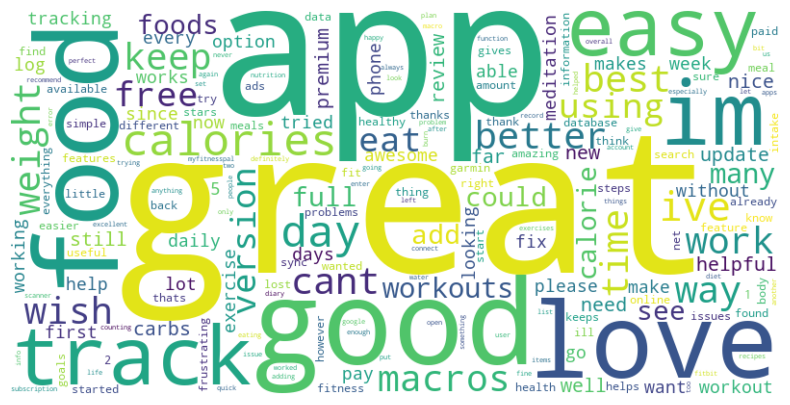

In [1583]:
#figure 11
'''1. Generate a word cloud for the most frequent keywords found in 5-star reviews, but exclude common stopwords and app names. 
Additionally, filter the reviews to include only those from apps in the "Health & Fitness" category.
'''
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import string

# Load datasets
apps_file = "Play Store Data.csv"
reviews_file = "User Reviews.csv"
df = pd.read_csv(apps_file)
reviews_df = pd.read_csv(reviews_file)

# Merge datasets to get category information
merged_df = reviews_df.merge(df[['App', 'Category']], on='App', how='left')

# Filter for Health & Fitness category and Positive sentiment reviews
health_fitness_reviews = merged_df[
    (merged_df['Category'] == 'HEALTH_AND_FITNESS') & (merged_df['Sentiment'] == 'Positive')
]['Translated_Review'].dropna()

# Define a set of common English stopwords manually
common_stopwords = set([
    "the", "and", "to", "a", "of", "in", "is", "it", "for", "on", "with", "this", "that",
    "was", "as", "are", "but", "be", "so", "if", "or", "an", "by", "at", "your", "from",
    "has", "have", "not", "you", "about", "which", "they", "will", "we", "can", "one", 
    "all", "more", "when", "just", "like", "do", "would", "me", "my", "its", "out", "up",
    "how", "their", "there", "some", "than", "then", "been", "no", "into", "what", "them",
    "who", "also", "because", "where", "while", "use", "used", "really", "even", "very",
    "much", "he", "she", "him", "her", "our", "ours", "i", "u", "get", "got", "dont", "doesnt"
])

# Tokenize and clean the text using the predefined stopwords
words = []
for review in health_fitness_reviews:
    tokens = review.lower().translate(str.maketrans('', '', string.punctuation)).split()
    words.extend([word for word in tokens if word not in common_stopwords])

# Count word frequency
word_freq = Counter(words)

# Generate and display the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [1584]:
#figure 12
"""2. Create a dual-axis chart comparing the average installs and revenue for free vs. paid apps within the top 3 app categories. 
Apply filters to exclude apps with fewer than 10,000 installs and revenue below $10,000 and android version should be more than 4.0 as well as size should be more than 15M and content rating should be Everyone and app name should not have more than 30 characters including space and special character .
this graph should work only between 1 PM IST to 2 PM IST apart from that time we should not show this graph in dashboard itself."""

apps_df['Installs'] = apps_df['Installs'].astype(str).str.replace(r'[+,]', '', regex=True).astype(int)

apps_df['Size'] = apps_df['Size'].replace({'M': ''}, regex=True).astype(float)

apps_df['Revenue'] = pd.to_numeric(apps_df['Revenue'], errors='coerce')

apps_df['Android Ver'] = apps_df['Android Ver'].str.extract(r'(\d+\.\d+)')
apps_df['Android Ver'] = pd.to_numeric(apps_df['Android Ver'], errors='coerce')

filtered_apps = apps_df[
    (apps_df['Installs'] >= 10000) &  # Only apps with installs >= 10,000
    (apps_df['Android Ver'] >= 4.0) &      # Only apps with a android version >= 4.0
    (apps_df['Revenue'] >= 10000) &   # Only apps with revenue >= 10,000
    (apps_df['Size'] > 15.0) &        # Only apps with size > 15 MB
    (apps_df['Content Rating'] == 'Everyone') &  # Only apps rated 'Everyone'
    (apps_df['App'].str.len() <= 30)  # Only apps with name length <= 30
]

# Select top 3 app categories based on total installs
top_categories = (
    filtered_apps.groupby('Category')['Installs']
    .sum()
    .nlargest(3)
    .index
)

filtered_apps = filtered_apps[filtered_apps['Category'].isin(top_categories)]

plot_data = (
    filtered_apps.groupby(['Category', 'Type'])
    .agg({
        'Installs': 'mean',
        'Revenue': 'mean'
    })
    .reset_index()
)

# Check if the current time is between 1 PM and 2 PM IST
current_time = datetime.now(pytz.timezone('Asia/Kolkata')).time()
start_time = datetime.strptime('13:00', '%H:%M').time()
end_time = datetime.strptime('14:00', '%H:%M').time()

if start_time <= current_time <= end_time:
    fig12 = go.Figure()
    # average installs bar chart
    fig12.add_trace(
        go.Bar(
            x=plot_data['Category'] + ' (' + plot_data['Type'] + ')',
            y=plot_data['Installs'],
            name='Average Installs',
            marker_color='skyblue',
            yaxis='y1'
        )
    )

    # average revenue line chart
    fig12.add_trace(
        go.Scatter(
            x=plot_data['Category'] + ' (' + plot_data['Type'] + ')',
            y=plot_data['Revenue'],
            name='Revenue',
            mode='lines+markers',
            line=dict(color='red', width=2),
            marker=dict(size=8, symbol='circle'),
            yaxis='y2'
        )
    )

    fig12.update_layout(
        title=dict(
            text='Comparison of Average Installs and Revenue (Free vs. Paid)',
            font=dict(size=12),
            x=0.5,
            font_color = 'white'
        ),
        xaxis_title='App Categories (Type)',
        xaxis=dict(tickangle=-45,
        tickfont=dict(size=8, color='white'),  
        title=dict(
        text='App Categories (Type)', 
        font=dict(color='white') 
        )),
        yaxis=dict(
            title='Average Installs',
            titlefont=dict(color='skyblue'),
            tickfont=dict(color='skyblue'),
            gridcolor='gray'
        ),
        yaxis2=dict(
            title='Revenue',
            titlefont=dict(color='red'),
            tickfont=dict(color='red'),
            overlaying='y',
            side='right'
        ),
        legend=dict(
            orientation='h',
            yanchor='top',
            y=-0.3,
            xanchor='center',
            x=0.5,
            font=dict(size=8)
        ),
        plot_bgcolor='black',
        paper_bgcolor='black',
        height=300,
        width=400
    )
    save_plot_as_html(fig12, "Top_Categories_Installs_and_Revenue_Chart_17.html", "The violin plot shows the distribution of ratings for each app category.")
else:
    print("This chart is only available between 1 PM and 2 PM IST.")

This chart is only available between 1 PM and 2 PM IST.


In [1585]:
#figure 13
'''Task 3. Generate a heatmap to show the correlation matrix between installs, ratings, and review counts. 
Filter the data to include only apps that have been updated within the last year and have at least 100,000 installs and reviews count should be more than 1k and 
genres name should not be Starting with characters A , F , E , G , I , K . 
this graph should work only between 2 PM IST to 4 PM IST apart from that time we should not show this graph in dashboard itself.'''
import pandas as pd
import pytz
from datetime import datetime, timedelta
import plotly.express as px


file_path = 'Play Store Data.csv'
apps_df = pd.read_csv(file_path)


apps_df['Installs'] = apps_df['Installs'].str.replace(r'[^\d]', '', regex=True)
apps_df['Installs'] = pd.to_numeric(apps_df['Installs'], errors='coerce')
apps_df['Reviews'] = pd.to_numeric(apps_df['Reviews'], errors='coerce')
apps_df['Last Updated'] = pd.to_datetime(apps_df['Last Updated'], errors='coerce')


latest_date = apps_df['Last Updated'].max()
one_year_ago = latest_date - timedelta(days=365)

# Apply Filters
filtered_apps = apps_df[
    (apps_df['Last Updated'] >= one_year_ago) &  # Updated in the last year
    (apps_df['Installs'] >= 100000) &           # At least 100,000 installs
    (apps_df['Reviews'] > 1000) &               # More than 1,000 reviews
    (~apps_df['Genres'].str.startswith(tuple('AFEGIK'), na=False))  # Exclude genres starting with A, F, E, G, I, K
]


correlation_data = filtered_apps[['Installs', 'Rating', 'Reviews']].dropna()


current_time = datetime.now(pytz.timezone('Asia/Kolkata')).time()
start_time = datetime.strptime('14:00', '%H:%M').time()
end_time = datetime.strptime('16:00', '%H:%M').time() 


if start_time <= current_time <= end_time:
    if not correlation_data.empty:
        correlation_matrix = correlation_data.corr()

        # Create heatmap
        fig13 = px.imshow(
            correlation_matrix,
            text_auto=True,
            color_continuous_scale='Viridis',
            labels=dict(x="Metrics", y="Metrics", color="Correlation"),
            title="Correlation Matrix: Installs, Ratings, and Reviews"
        )

  
        fig13.update_layout(
            title_font=dict(size=12, color='white'),
            xaxis=dict(tickangle=45),
            plot_bgcolor='black',
            paper_bgcolor='black',
            font=dict(color='white'),
            height=300,
            width=400
        )

        save_plot_as_html(fig13, "Correlation_Matrix_Heatmap.html", "This graph shows a correlation matrix between review, Ratings, Installs")
        print("Heatmap saved as 'Correlation_Matrix_Heatmap.html'.")
    else:
        print("No data available for the specified filters.")
else:
    print("This heatmap is only available between 2 PM and 4 PM IST.")


This heatmap is only available between 2 PM and 4 PM IST.


In [1586]:
plot_containers_split=plot_containers.split('</div>')

In [1587]:
if len(plot_containers_split) > 1:
    final_plot=plot_containers_split[-2]+'</div>'
else:
    final_plot=plot_containers

In [1588]:
dashboard_html= """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name=viewport" content="width=device-width,initial-scale-1.0">
    <title> Google Play Store Review Analytics</title>
    <style>
        body {{
            font-family: Arial, sans-serif;
            background-color: #333;
            color: #fff;
            margin: 0;
            padding: 0;
        }}
        .header {{
            display: flex;
            align-items: center;
            justify-content: center;
            padding: 20px;
            background-color: #444
        }}
        .header img {{
            margin: 0 10px;
            height: 50px;
        }}
        .container {{
            display: flex;
            flex-wrap: wrap;
            justify_content: center;
            padding: 20px;
        }}
        .plot-container {{
            border: 2px solid #555
            margin: 10px;
            padding: 10px;
            width: {plot_width}px;
            height: {plot_height}px;
            overflow: hidden;
            position: relative;
            cursor: pointer;
        }}
        .insights {{
            display: none;
            position: absolute;
            right: 10px;
            top: 10px;
            background-color: rgba(0,0,0,0.7);
            padding: 5px;
            border-radius: 5px;
            color: #fff;
        }}
        .plot-container: hover .insights {{
            display: block;
        }}
        </style>
        <script>
            function openPlot(filename) {{
                window.open(filename, '_blank');
                }}
        </script>
    </head>
    <body>
        <div class= "header">
            <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4a/Logo_2013_Google.png/800px-Logo_2013_Google.png" alt="Google Logo">
            <h1>Google Play Store Reviews Analytics</h1>
            <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/78/Google_Play_Store_badge_EN.svg/1024px-Google_Play_Store_badge_EN.svg.png" alt="Google Play Store Logo">
        </div>
        <div class="container">
            {plots}
        </div>
    </body>
    </html>
    """


In [1589]:
final_html=dashboard_html.format(plots=plot_containers,plot_width=plot_width,plot_height=plot_height)

In [1590]:
dashboard_path=os.path.join(html_files_path,"web page.html")

In [1591]:
with open(dashboard_path, "w", encoding="utf-8") as f:
    f.write(final_html)

In [1592]:
webbrowser.open('file://'+os.path.realpath(dashboard_path))

True